In [8]:
#1. Find Mean, Median, Mode
#2. Check for Null Values if any
#3. Sort the dataset in increasing order of height
#4. Data Visualization
#5. Outlier Detection

In [31]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('/home/abhi/Desktop/weight.csv')

In [11]:
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
print(df.shape)
print(df.info)

(10000, 3)
<bound method DataFrame.info of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>


# mean,median,mode

In [25]:
#mean of height

n = len(df["Height"]) 
gsum = sum(df["Height"]) 
mean = gsum / n 
  
print("Mean / Average is: " + str(mean)) 

Mean / Average is: 66.36755975486587


In [26]:
#mean of Weight
n = len(df["Weight"]) 
gsum = sum(df["Weight"]) 
mean = gsum / n 
  
print("Mean / Average is: " + str(mean)) 

Mean / Average is: 161.4403568334301


In [54]:
Height = df.iloc[:,1].values

n = len(Height) 
weight.sort() 
  
if n % 2 == 0: 
    median1 = Height[n//2] 
    median2 = Height[n//2 - 1] 
    median = (median1 + median2)/2
else: 
    median = Height[n//2] 
print("Median is: " + str(median))

Median is: 66.31807008


In [52]:
weight = df.iloc[:,2].values

n = len(weight) 
weight.sort() 
  
if n % 2 == 0: 
    median1 = weight[n//2] 
    median2 = weight[n//2 - 1] 
    median = (median1 + median2)/2
else: 
    median = weight[n//2] 
print("Median is: " + str(median))

Median is: 161.2129277


In [48]:
#Mode
n = len(df["Weight"]) 
  
data = Counter(df["Weight"]) 
get_mode = dict(data) 
mode = [k for k, v in get_mode.items() if v == max(list(data.values()))] 
  
if len(mode) == n: 
    get_mode = "No mode found"
else: 
    get_mode = "Mode is / are: " + ', '.join(map(str, mode)) 
      
print(get_mode)

No mode found


In [56]:
from collections import Counter 
height = df.iloc[:,1].values
height

n = len(height) 
  
data = Counter(height) 
get_mode = dict(data) 
mode = [k for k, v in get_mode.items() if v == max(list(data.values()))] 
  
if len(mode) == n: 
    get_mode = "No mode found"
else: 
    get_mode = "Mode is / are: " + ', '.join(map(str, mode)) 
      
print(get_mode)

No mode found


In [59]:
from scipy import stats
mod1= stats.mode(df['Height'])
print('Mode of Height is: ', mod1)
mod2= stats.mode(df['Weight'])
print('Mode of Weight is: ', mod2)

Mode of Height is:  ModeResult(mode=array([54.26313333]), count=array([1]))
Mode of Weight is:  ModeResult(mode=array([64.70012671]), count=array([1]))


# checking null values

In [6]:
df.isnull()
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
df.isnull().any(axis=0)

Gender    False
Height    False
Weight    False
dtype: bool

# Sorting on basis of height

In [14]:
df.sort_values(["Height"], axis=0, 
                 ascending=True, inplace=True) 

In [15]:
df

,Gender,Height,Weight
9285,Female,54.263133,64.700127
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412
5345,Female,55.336492,88.366583
...,...,...,...
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


#plotting
# visualisation

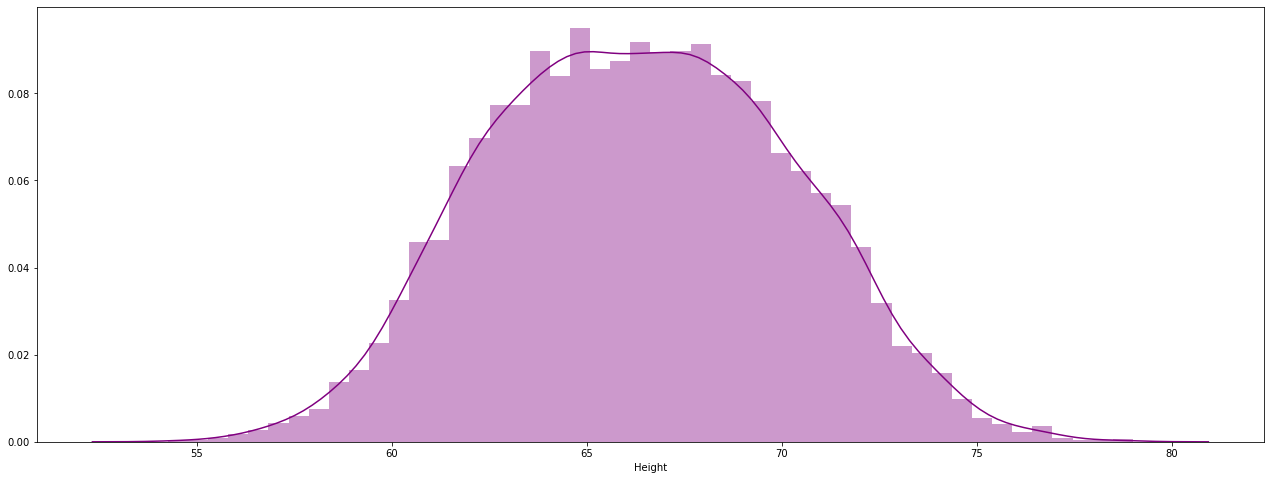

In [42]:
plt.figure(figsize=(22,8))
sns.distplot(df['Height'], color = 'purple')
plt.show()

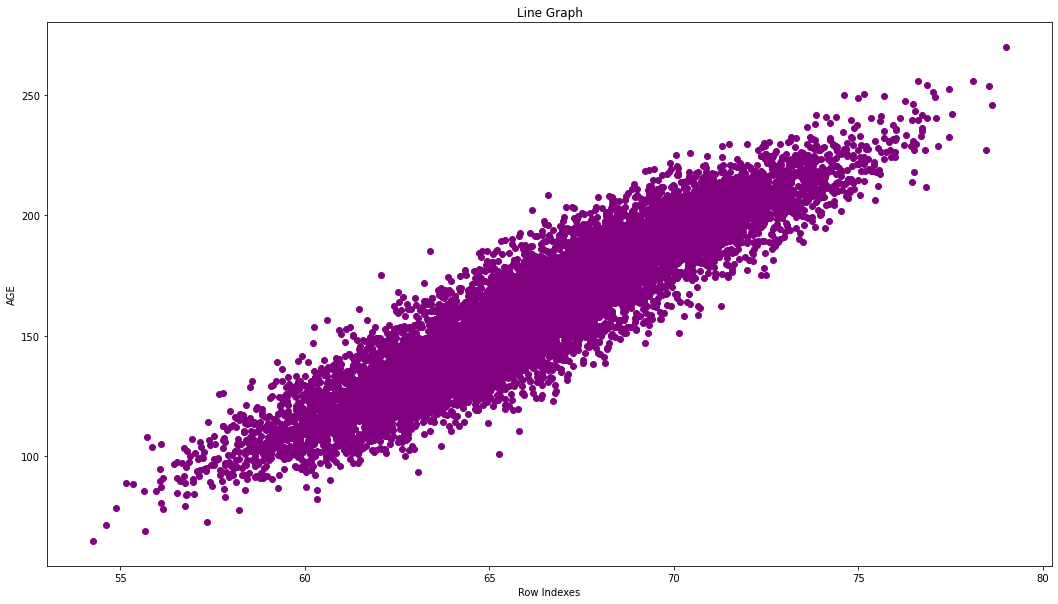

In [41]:
plt.figure(figsize=(18,10))
plt.scatter(df['Height'],df['Weight'], color ='purple')
plt.title("Line Graph")
plt.xlabel("Row Indexes")
plt.ylabel("AGE")
plt.show()


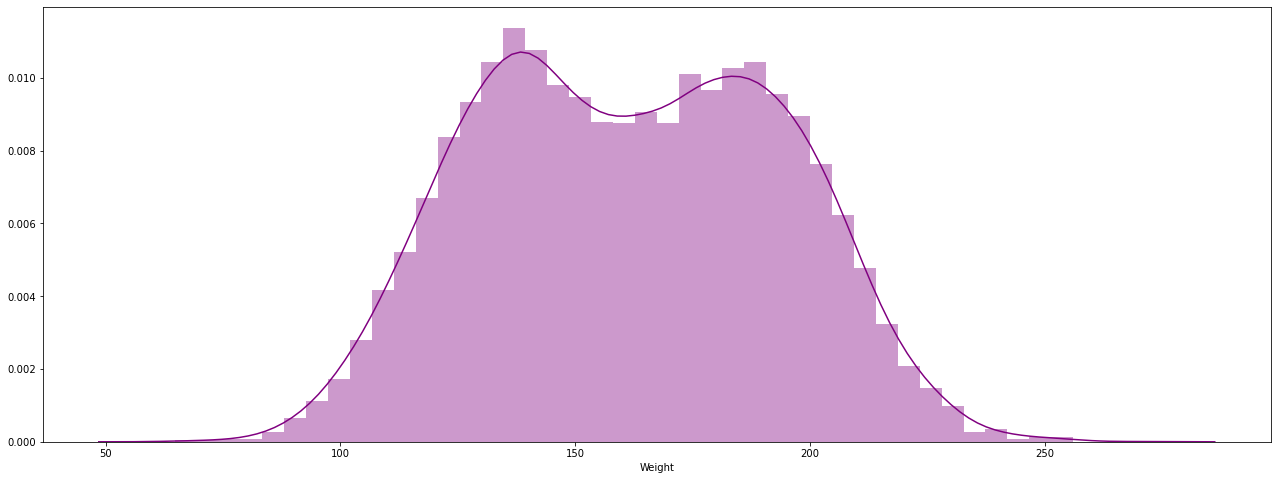

In [44]:
plt.figure(figsize=(22,8))
sns.distplot(df['Weight'], color = 'purple')
plt.show()

# outlier detection

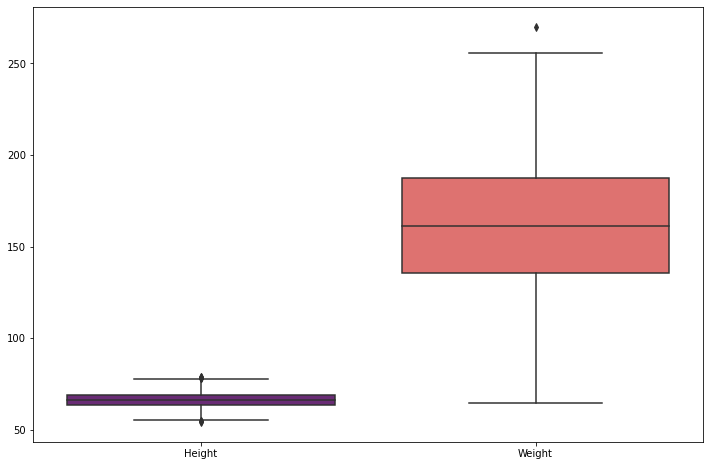

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df, palette='magma')
plt.show()

In [57]:


for j in ['Male', 'Female']:
    for i in ['Height', 'Weight']:
        Q1 = df[df['Gender'] == j][i].quantile(0.25)
        Q3 = df[df['Gender'] == j][i].quantile(0.75)
        iqr = Q3 - Q1
        lower = Q1 - (1.5 * iqr)
        upper = Q3 + (1.5 * iqr)
        print('\nOutliers For ' + i + ' for ' + j + '\n')
        print(df[df['Gender'] == j][df[i] > upper][['Gender', i]])
        print(df[df['Gender'] == j][df[i] < lower][['Gender', i]])


Outliers For Height for Male

     Gender     Height
3816   Male  76.719985
4701   Male  76.732446
2318   Male  76.806344
2623   Male  76.842679
4331   Male  76.848761
4275   Male  76.866855
3669   Male  77.008336
3909   Male  77.067355
4297   Male  77.100872
912    Male  77.160801
1922   Male  77.446620
2070   Male  77.465569
4569   Male  77.547186
994    Male  78.095867
1317   Male  78.462053
3285   Male  78.528210
3757   Male  78.621374
2014   Male  78.998742
     Gender     Height
4794   Male  58.406905
2334   Male  59.380650
4637   Male  59.868078
2191   Male  59.938650
1942   Male  59.981865
3020   Male  60.217019
4170   Male  60.243718
2974   Male  60.267190
2527   Male  60.269108
1238   Male  60.363312
4980   Male  60.614115
551    Male  60.679817
3332   Male  60.721080
426    Male  60.748118
1577   Male  60.798886
1442   Male  60.820271
2925   Male  60.935740
2959   Male  60.936236
1715   Male  60.966723
4324   Male  60.972032
2500   Male  61.074487
4402   Male  61.090747
936

<ipython-input-57-821a9b7956ea>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['Gender'] == j][df[i] > upper][['Gender', i]])
<ipython-input-57-821a9b7956ea>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['Gender'] == j][df[i] < lower][['Gender', i]])
<ipython-input-57-821a9b7956ea>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['Gender'] == j][df[i] > upper][['Gender', i]])
<ipython-input-57-821a9b7956ea>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['Gender'] == j][df[i] < lower][['Gender', i]])
<ipython-input-57-821a9b7956ea>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['Gender'] == j][df[i] > upper][['Gender', i]])
<ipython-input-57-821a9b7956ea>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df['Gender'] ==